In [2]:
import tensorflow as tf
print('tensorflow version: ', tf.__version__)
import keras
print('keras version: ', keras.__version__)

tensorflow version:  2.4.0
keras version:  2.4.3


In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
# dimensions of the tensor train_images, stored in .ndim attribute
print("train_images.ndim = ", train_images.ndim)

# shape of the tensor train_images
print("train_images.shape = ", train_images.shape)

# data type of the tensor 
print("train_images.dtype = ", train_images.dtype)

train_images.ndim =  3
train_images.shape =  (60000, 28, 28)
train_images.dtype =  uint8


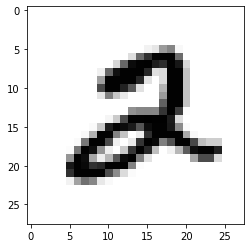

In [9]:
import matplotlib.pyplot as plt

# display one of the digits stored in the tensor 
digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [11]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [12]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
# preprocess the data by reshaping it into the shape that the network expects
train_images = train_images.reshape((60000, 28 * 28))

# scale the data so that all values are in the [0, 1] interval
train_images = train_images.astype('float32') / 255

# preprocess test data
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_images.shape

(60000, 784)

In [14]:
from keras.utils import to_categorical

# categorically encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
# train the network
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.4339 - accuracy: 0.8730
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1123 - accuracy: 0.9672
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0682 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0475 - accuracy: 0.9861
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0353 - accuracy: 0.9900


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9803
test_loss: 0.06557202339172363
test_acc: 0.9803000092506409
